In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.reset_option('display.max_columns')

# Replace 'your_folder_path' with the actual path to your folder
folder_path = 'chr'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate through each CSV file and append its content to the list
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)
    #break

# Concatenate all DataFrames in the list into a single DataFrame
gnom_df = pd.concat(dfs, ignore_index=True)

print(gnom_df.shape)

gnom_df.head(10)

(113430, 66)


,Unnamed: 0,chromo,strand,start,end,genename,Major_Exon_Size,count,alt5,constitLevel,...,Allele Frequency South Asian,Allele Count Remaining,Allele Number Remaining,Allele Frequency Remaining,Allele Count African/African American,Allele Number African/African American,Allele Frequency African/African American,Allele Count Middle Eastern,Allele Number Middle Eastern,Allele Frequency Middle Eastern
0,0,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2088,0.0,0,41476,0.000000,0.0,316.0,0.000000
1,1,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000207,0,2094,0.0,0,41418,0.000000,0.0,316.0,0.000000
2,2,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2108,0.0,0,41458,0.000000,0.0,294.0,0.000000
3,3,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2092,0.0,1,41390,0.000024,0.0,316.0,0.000000
4,4,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2090,0.0,1,41418,0.000024,0.0,316.0,0.000000
5,5,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2092,0.0,1,41404,0.000024,0.0,316.0,0.000000
6,6,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2112,0.0,0,41526,0.000000,1.0,294.0,0.003401
7,7,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2090,0.0,1,41406,0.000024,0.0,316.0,0.000000
8,8,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2092,0.0,1,41448,0.000024,0.0,316.0,0.000000
9,9,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2092,0.0,5,41412,0.000121,0.0,316.0,0.000000


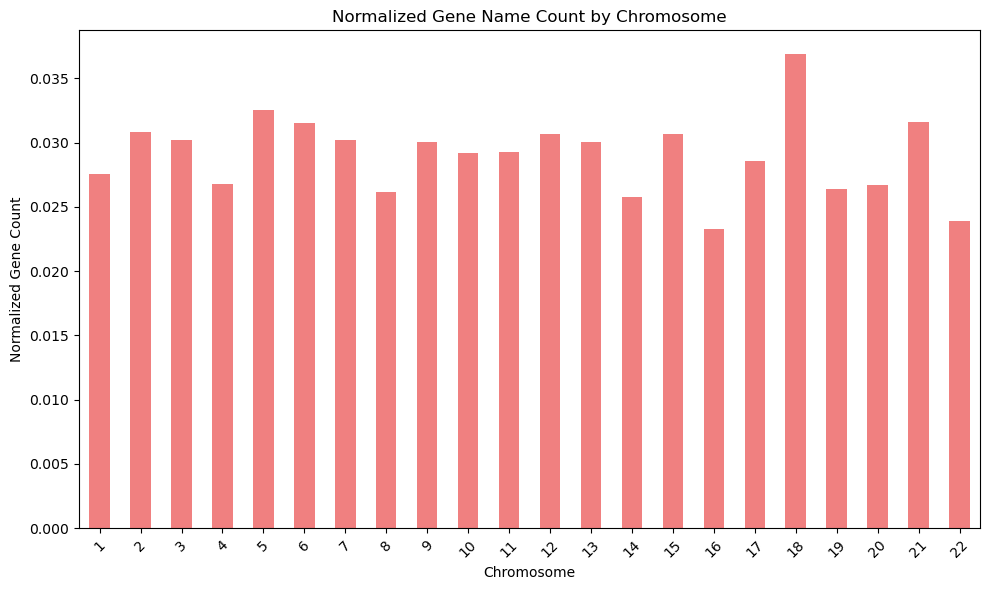

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'chromo' and count the number of variants (rows) for each chromosome
variants_by_chromo = gnom_df.groupby('chromo').size()

# Group by 'chromo' and count the number of unique gene names for each chromosome
genename_count_by_chromo = gnom_df.groupby('chromo')['genename'].nunique()

# Normalize gene name counts by the number of variants for each chromosome
normalized_gene_count = genename_count_by_chromo / variants_by_chromo

# Extract the numeric part of chromosome labels for sorting
chromosome_numeric = normalized_gene_count.index.str.extract(r'(\d+)$')[0].astype(int)

# Sort both normalized gene count and chromosome labels by the extracted numeric part
normalized_gene_count.index = chromosome_numeric
normalized_gene_count = normalized_gene_count.sort_index()

# Plot the normalized gene name count by chromosome
plt.figure(figsize=(10, 6))
normalized_gene_count.plot(kind='bar', color='lightcoral')

# Add labels and title
plt.title('Normalized Gene Name Count by Chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Normalized Gene Count')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
gnom_df['Allele Frequency Admixed American']  = gnom_df['Allele Count Admixed American'] / gnom_df['Allele Number Admixed American']

gnom_df['Allele Frequency African/African American']  = gnom_df['Allele Count African/African American'] / gnom_df['Allele Number African/African American']

gnom_df['Allele Frequency Ashkenazi Jewish']  = gnom_df['Allele Count Ashkenazi Jewish'] / gnom_df['Allele Number Ashkenazi Jewish']

gnom_df['Allele Frequency East Asian']  = gnom_df['Allele Count East Asian'] / gnom_df['Allele Number East Asian']

gnom_df['Allele Frequency Middle Eastern']  = gnom_df['Allele Count Middle Eastern'] / gnom_df['Allele Number Middle Eastern']

gnom_df['Allele Frequency Amish']  = gnom_df['Allele Count Amish'] / gnom_df['Allele Number Amish']

gnom_df['Allele Frequency South Asian']  = gnom_df['Allele Count South Asian'] / gnom_df['Allele Number South Asian']

gnom_df['Allele Frequency European (Finnish)']  = gnom_df['Allele Count European (Finnish)'] / gnom_df['Allele Number European (Finnish)']

gnom_df['Allele Frequency European (non-Finnish)']  = gnom_df['Allele Count European (non-Finnish)'] / gnom_df['Allele Number European (non-Finnish)']

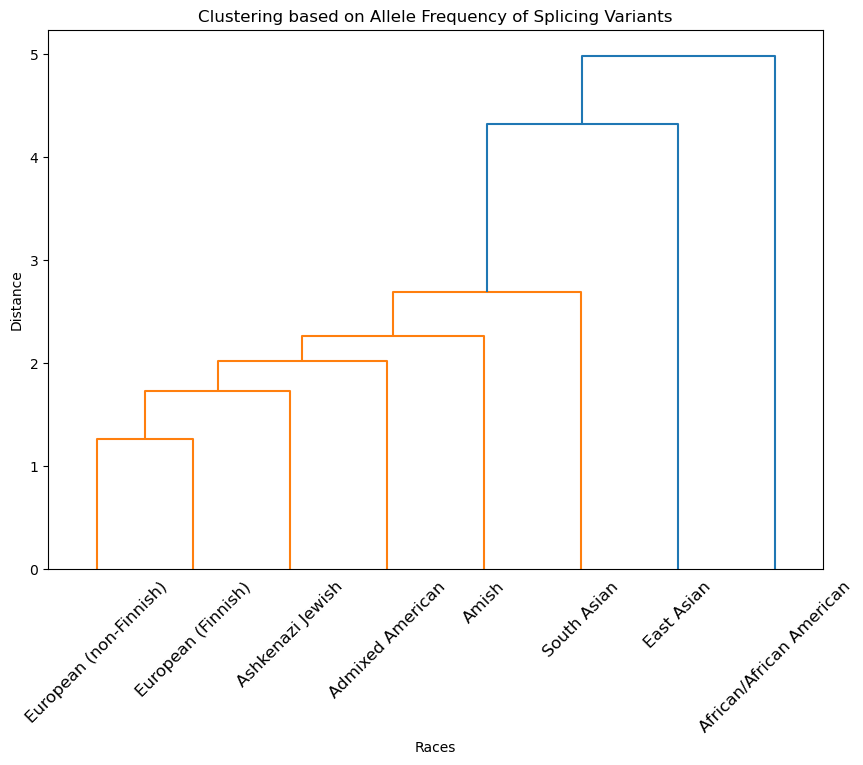

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'East Asian', 'South Asian']

# Example DataFrame creation
data = {
    x: gnom_df["Allele Frequency " + x] for x in colnames
}
df = pd.DataFrame(data)

df = df.fillna(0)

# Calculate hierarchical clustering
linkage_matrix = linkage(df.transpose(), method='average')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df.columns, orientation='top', distance_sort='descending')
plt.title('Clustering based on Allele Frequency of Splicing Variants')
plt.xlabel('Races')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.show()


<Figure size 900x600 with 0 Axes>

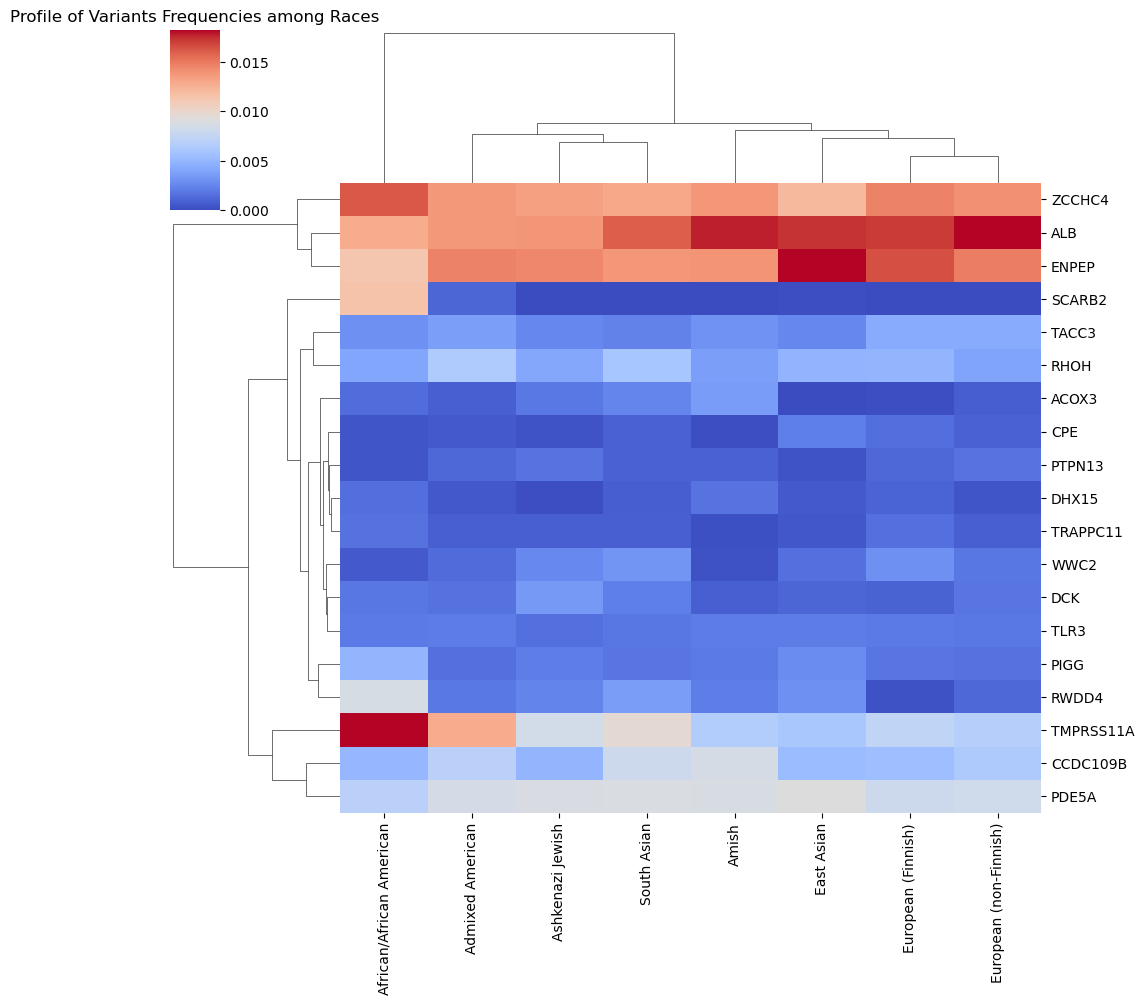

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'East Asian', 'South Asian']

genenames = gnom_df[gnom_df['chromo'] == 'chr4']['genename'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df[gnom_df['genename'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)

# Specify the percentage cutoff (e.g., 10%)
percentage_cutoff = 0.05

# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Calculate the cutoff value based on the percentage of max_af
cutoff = row_means.max() * percentage_cutoff

# Filter rows where the mean allele frequency is greater than or equal to the cutoff
filtered_df = df[row_means >= cutoff]
#filtered_df = df



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()